# Band Diagram
將通過考慮一個更小、更抽象的計算來構建holey-wvg-cavity  
我們計算了無限週期 no defects 波導的band gap  
與 MPB 執行的計算類型非常相似但使用不同的方法  
分析哪些解可以在周期性結構中傳播  

在這種週期系統中 週期 Bloch 包絡乘以平面波$exp[i(k⋅x−\omega t)]$  
我們希望找到band 𝜔(𝑘) 只有一個週期方向，所以我們只有一個波矢量分量𝑘𝑥  
只需要在從𝑘𝑥=0到𝑘𝑥=𝜋的irreducible Brillouin zone尋找解

求解這些 eigenmodes 與求解resonant modes of a cavity非常相似  
輸入一個脈衝並通過 Harminv 分析響應，只是我們的計算單元和邊界條件不同  
𝜖 函數服從周期性邊界條件  
Bloch 週期性邊界條件  右側的場是 𝑒𝑥𝑝(𝑖𝑘𝑥⋅1) 乘以左側的場  
每個 𝑘𝑥 單獨的計算以獲取該 𝑘𝑥 處的頻率

In [1]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video
#%matplotlib notebook

In [2]:
# Some parameters to describe the geometry:
eps = 13    # dielectric constant of waveguide
w = 1.2     # width of waveguide
r = 0.36    # radius of holes

# The cell dimensions
sy = 12     # size of cell in y direction (perpendicular to wvg.)
dpml = 1    # PML thickness (y direction only!)
cell = mp.Vector3(1, sy)

b = mp.Block(size=mp.Vector3(1e20, w, 1e20), material=mp.Medium(epsilon=eps))
c = mp.Cylinder(radius=r)

geometry = [b,c]

resolution=20

單元格現在在 x 方向上的大小為 1，並且不需要任何循環來複製幾何圖形  
PML 吸收邊界有一些新的東西

In [3]:
pml_layers = [mp.PML(dpml, direction=mp.Y)]

不希望在 𝑥 方向上有任何吸收層  
添加 direction=mp.Y 只是在 𝑦 邊界上指定 PML 層

source將是來自 𝐻𝑧 point source的Gaussian puls

In [4]:
fcen = 0.25  # pulse center frequency
df = 1.5     # pulse freq. width: large df = short impulse

s = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Hz,
              center=mp.Vector3(0.1234,0))]

source放在 (0.1234,0) 處  
𝑥 坐標是隨機的 確保源將耦合到任意模式 𝑦 坐標為 0  
意味著我們將只關注 𝐻𝑧 偏振奇對稱模式  

In [5]:
sym = [mp.Mirror(direction=mp.Y, phase=-1)]

無論來源如何，我們都沒有 𝑋 對稱平面，因為這種對稱性被 0<𝑘𝑥<𝜋 的邊界條件破壞了

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


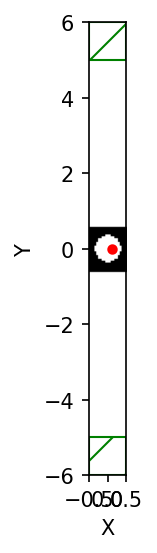

In [6]:
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=s,
                    symmetries=sym,
                    resolution=resolution)
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.show()

通過 k_point 變量設置 𝑘 的值，然後將 until_after_sources 與 Harminv 一起使用

In [7]:
kx = 0.4
sim.k_point = mp.Vector3(kx)

sim.run(mp.after_sources(mp.Harminv(mp.Hz, mp.Vector3(0.1234), fcen, df)),
        until_after_sources=300)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000385046 s
Working in 2D dimensions.
Computational cell is 1 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00566101 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.1889817702712737, -3.218623094657481e-09, 29357548.97567227, 0.9173628219234794, 0.6215560187213979-0.6747019065028753i, 2.349158537413511e-09+0.0i
harminv0:, 0.3139771683284259, -4.607660678161704e-08, 3407121.2081278074, 0.1681313249224799, -0.160186254001579+0.051073539618183145i, 8.561734369858962e-09+0.0i
harminv0:, 0.39531353194030816, 0.0001231747463819234, -1604.6857962044187, 0.03947034109218081, 0.013611923046040773+0.03704893219678215i, 1.4827892230365341e-08+0.0i
harminv0:, 0.5829248393897741, -0.001412499404486212, 206.34516288585957, 0.03141667035120538, -0.030763086691828284+0.006374925344454181i, 1.754662774985616e-08+0.0i
harminv0:, 0.7249956125507073, -0.002032970106791279, 178.309462133459, 0.07900563017901421, 0.06973686329598451+0.03713030430282425i, 4.664119617463905e-08+0.0i
harminv0:, 0.7767057476818011, -0.005004962007989345, 77.59357078454916, 0.048909310399164185, 0.03731786345296979-0

給了我們單個 𝑘=0.4⋅2𝜋𝑥̂ 的頻率  
在 Meep 中，𝑘 被指定為坐標中的向量，單位為 2𝜋 /distance  
與 MPB 不同，後者使用倒數格向量的基礎  
有一個內置函數將在源完成後運行一段時間作為輸入，如上面的 300，以及 𝑘 點列表

In [8]:
%%capture
sim.restart_fields()
k_interp = 19
kpts = mp.interpolate(k_interp, [mp.Vector3(0), mp.Vector3(0.5)])
all_freqs = sim.run_k_points(300, kpts)

𝑘=0 和 𝑘=0.5⋅2𝜋𝑥̂ 之間插入一組 19 個𝑘點，以覆蓋irreducible Brillouin zone  
此函數使用從源列表中的高斯源獲取的頻率範圍和位置自動運行 Harminv  

繪製 𝜔 的實部，其中light cone 𝜔>𝑐𝑘 為灰色陰影，我們發現

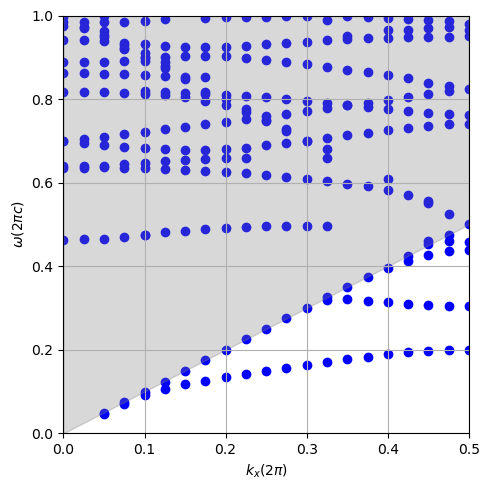

In [9]:
kx = [k.x for k in kpts]
fig = plt.figure(dpi=100,figsize=(5,5))
ax = plt.subplot(111)
for i in range(len(all_freqs)):
    for ii in range(len(all_freqs[i])):
        plt.scatter(kx[i],np.real(all_freqs[i][ii]),color='b')

ax.fill_between(kx, kx, 1.0, interpolate=True, color='gray', alpha = 0.3)
plt.xlim(0,0.5)
plt.ylim(0,1)
plt.grid(True)
plt.xlabel('$k_x(2\pi)$')
plt.ylabel('$\omega(2\pi c)$')
plt.tight_layout()
plt.show()

灰色陰影區域是light cone 𝜔>𝑐𝑘𝑥 它是對應於在波導周圍的空氣中擴展的模式的區域  
在light cone下方，我們看到了幾個離散的guided bands，它們必須具有位於波導附近的場模式  
由於數值誤差或有限的計算單元大小，light cone以下波段的 𝜔 的虛部非常小  
guided mode的一小部分與 PML 重疊  一和第二導模之間的guided mode，從大約 0.2 到 0.3  

light cone內我們還看到了幾個離散的波段 這些是洩漏模式或共振，它們具有一些固定的lifetime  
因為它們與光錐內的輻射狀態耦合，這反映在它們的虛部 𝜔 中  
對於波導，報告每單位距離的損耗更為常規  
為了得到這個，你可以將單位時間的損失除以群速度|𝑑𝜔/𝑑𝑘𝑥|=|𝑠𝑙𝑜𝑝𝑒|  
Harminv 僅識別具有相當長壽命的洩漏模式 (默認閾值是 50 個週期的生命週期或 𝑄)  

使用像 Meep 這樣的時域程序計算能帶圖，特別是對於洩漏模式，涉及到一些微妙之處。  
如果我們指定太大的 df（太窄的源），Harminv 的準確度將會下降，因為增加的模式數量會使信號處理更加病態  
有時，Harminv 會報告一個虛假的mode 將在圖上顯示為一個孤立的點  
有時必須小心模式，尤其是虛部，以確保它們不是由於單元太小或信號處理錯誤太大（因為運行時間太短或因為搜索的帶寬太大）  
前 Meep 並未嘗試為頻段“連接點”——頻率按遞增順序打印，但由於模式在其損失變得太大時消失，這意味著單個頻段可能會被分成幾列  

似乎有一些band正好沿著光錐的邊緣延伸  
這些不是洩漏模式，而是 PML 邊界不能很好地吸收平行於邊界傳播的光這一事實的偽影  
下面，我們將看到這些模式並不局限於波導。  

使用窄帶寬源以您想要的特定 ω 和 k 重新運行模擬，並輸出場模式 就像我們對諧振腔模式所做的那樣
以下幾種模式執行此操作：

* $k_x=0.4, \omega=0.1896$ guided mode
* $k_x=0.4, \omega=0.3175$ guided mode
* $k_x=0.1, \omega=0.4811−0.0017i$ leaky mode
* $k_x=0.3, \omega=0.8838−0.0018i$ leaky mode
* $k_x=0.25, \omega=0.2506$ light-cone (extended) mode


In [10]:
def run_sim(kx, omega, filename):
    s = [mp.Source(src=mp.GaussianSource(omega, fwidth=0.01), component=mp.Hz,
              center=mp.Vector3(0.1234,0))]
    sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=s,
                    symmetries=sym,
                    k_point = mp.Vector3(kx),
                    resolution=resolution)
    f = plt.figure(dpi=100)
    animate = mp.Animate2D(sim,fields=mp.Hz,f=f,normalize=True,realtime=False)
    sim.run(mp.at_every(5,animate),until_after_sources=1)
    animate.to_mp4(10,filename)
    plt.close()

In [11]:
kx = [0.4,0.4,0.1,0.3,0.25]
omega = [0.1896,0.3175,0.4811,0.8838,0.2506]
filename = ['holey-wvg-bands-{}-{}.mp4'.format(k,om) for (k,om) in zip (kx,omega)]
for (k,om,fn) in zip(kx,omega,filename):
    run_sim(*[k,om,fn])

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00145507 s
Working in 2D dimensions.
Computational cell is 1 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0063622 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=1001.0)

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
Normalizing field data...
run 0 finished at t = 1001.0 (40040 timesteps)
Generating MP4...
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000666857 s
Working in 2D dimensions.
Computational cell is 1 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00580716 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=1001.0)

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
Normalizing field data...
run 0 finished at t = 1001.0 (40040 timesteps)
Generating MP4...
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000838995 s
Working in 2D dimensions.
Computational cell is 1 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00550699 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=1001.0)

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
Normalizing field data...
run 0 finished at t = 1001.0 (40040 timesteps)
Generating MP4...
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000528097 s
Working in 2D dimensions.
Computational cell is 1 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00569701 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=1001.0)

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
Normalizing field data...
run 0 finished at t = 1001.0 (40040 timesteps)
Generating MP4...
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000443935 s
Working in 2D dimensions.
Computational cell is 1 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00599885 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=1001.0)

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
Normalizing field data...
run 0 finished at t = 1001.0 (40040 timesteps)
Generating MP4...


In [12]:
import IPython
for i in range(len(filename)):
    IPython.display.display(IPython.display.Video(filename[i]))

從頂部開始，前兩張圖片顯示了在 𝑘𝑥=0.4 處 light cone下方的前兩個guided bands  
第二個guided bands 向左傳播，這是由於其負斜率（但請注意，在𝑘𝑥=−0.4 處存在相應的右傳播模式）  

下一個模式是 𝑘𝑥=0.1 處的第一個洩漏模式  
隨著𝑘𝑥 變為零，這種模式實際上變得無損，這是一種與 Phys 中展示的效果相關的對稱特性  
然而，在這個非零 𝑘𝑥 處，輻射損失清晰可見  

下一個模式是能帶圖中可見的許多高階洩漏模式之一  
在 𝑘𝑥=0.3 ，𝜔=0.8838−0.0018𝑖 處任意選擇反向傳播模式進行繪圖  
從場圖可以看出，這種模式在材料中具有非常短的波長  
這足夠短，值得檢查有限分辨率引入的誤差有多大  
通過將分辨率翻倍至 40 像素/單位，我們發現此模式已轉變為 𝜔ω=0.8996−0.0021𝑖 ，或者在較低分辨率下大約有 2% 的誤差  

最後，我們展示了沿著light cone邊緣的一種模式，在𝑘𝑥=0.25，𝜔=0.2506  
這種模式顯然不局限於波導，只是在平行於波導的空氣中傳播——也就是說，它實際上是擴展模式連續體的一部分，它的離散性是有限單元和不完美邊界條件的產物  
對於完全平行於邊界傳播的光，PML 不是很有效，所以對於這個場，ω 的虛部只有 -0.0008